/tmp/fire-
/tmp/fire-
total training fire images: 109
total training nofire images: 157


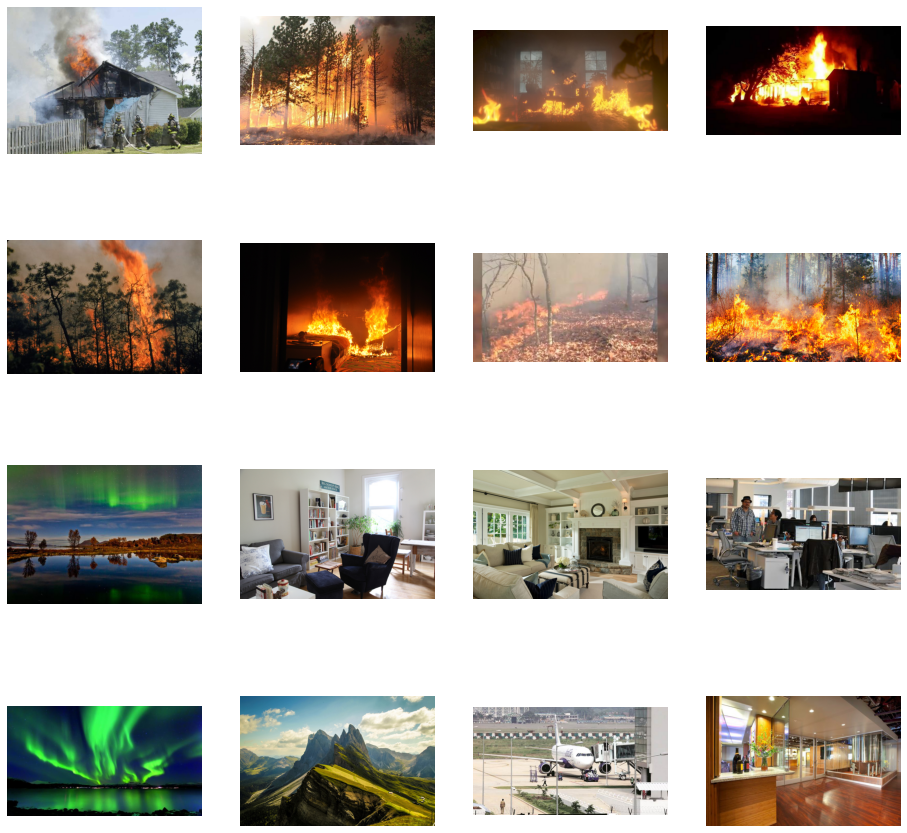

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [6]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory with our training fire pictures
train_fire_dir = os.path.join('/tmp/fire-or-nofire/Fire')

# Directory with our training nofire pictures
train_nofire_dir = os.path.join('/tmp/fire-or-nofire/No-Fire')

# To see what the filenames look like in the Fire and No-Fire training directories:

train_fire_names = os.listdir(train_fire_dir)
print(train_fire_dir[:10])

train_nofire_names = os.listdir(train_nofire_dir)
print(train_fire_dir[:10])

print('total training fire images:', len(os.listdir(train_fire_dir)))
print('total training nofire images:', len(os.listdir(train_nofire_dir)))

#Displaying the Dataset 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_fire_dir, fname) 
                for fname in train_fire_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_nofire_dir, fname) 
                for fname in train_nofire_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Designing the model

model = tf.keras.models.Sequential([
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

#Designing the model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/fire-or-nofire/',  # This is the source directory for training images
        target_size=(300, 300),  
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

#To train the model

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)



In [0]:
#To test the model
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a No-Fire")
  else:
    print(fn + " is a fire")